In [489]:
from cProfile import label
from tokenize import group

import basedosdados as bd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
from matplotlib.pyplot import legend, arrow
from reportlab.graphics.charts.utils import ticks
from scipy.constants import alpha

In [4]:
import basedosdados as bd

billing_id = 'basedosdados-443104'

query = """
  WITH 
dicionario_linha_fomento AS (
    SELECT
        chave AS chave_linha_fomento,
        valor AS descricao_linha_fomento
    FROM `basedosdados.br_cnpq_bolsas.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'linha_fomento'
        AND id_tabela = 'microdados'
),
dicionario_modalidade AS (
    SELECT
        chave AS chave_modalidade,
        valor AS descricao_modalidade
    FROM `basedosdados.br_cnpq_bolsas.dicionario`
    WHERE
        TRUE
        AND nome_coluna = 'modalidade'
        AND id_tabela = 'microdados'
)
SELECT
    dados.ano as ano,
    dados.processo as processo,
    dados.data_inicio_processo as data_inicio_processo,
    dados.data_fim_processo as data_fim_processo,
    dados.beneficiario as beneficiario,
    dados.titulo_projeto as titulo_projeto,
    dados.palavra_chave as palavra_chave,
    descricao_linha_fomento AS linha_fomento,
    descricao_modalidade AS modalidade,
    dados.categoria_nivel as categoria_nivel,
    dados.chamada as chamada,
    dados.programa_cnpq as programa_cnpq,
    dados.grande_area_conhecimento as grande_area_conhecimento,
    dados.area_conhecimento as area_conhecimento,
    dados.subarea_conhecimento as subarea_conhecimento,
    dados.pais_origem as pais_origem,
    dados.sigla_uf_origem as sigla_uf_origem,
    dados.instituicao_origem as instituicao_origem,
    dados.pais_destino as pais_destino,
    dados.sigla_uf_destino as sigla_uf_destino,
    dados.municipio_destino as municipio_destino,
    dados.sigla_instituicao_destino as sigla_instituicao_destino,
    dados.sigla_instituicao_macro as sigla_instituicao_macro,
    dados.instituicao_destino as instituicao_destino,
    dados.plano_interno as plano_interno,
    dados.unidade_orcamentaria as unidade_orcamentaria,
    dados.fonte_recurso as fonte_recurso,
    dados.natureza_despesa as natureza_despesa,
    dados.programa_ppa as programa_ppa,
    dados.acao_ppa as acao_ppa,
    dados.valor as valor
FROM `basedosdados.br_cnpq_bolsas.microdados` AS dados
LEFT JOIN `dicionario_linha_fomento`
    ON dados.linha_fomento = chave_linha_fomento
LEFT JOIN `dicionario_modalidade`
    ON dados.modalidade = chave_modalidade
"""

bd_cnpq = bd.read_sql(query = query, billing_project_id = billing_id)

Downloading: 100%|██████████| 2839708/2839708 [19:36<00:00, 2414.69rows/s]


In [324]:
bd_cnpq.head()

,ano,processo,data_inicio_processo,data_fim_processo,beneficiario,titulo_projeto,palavra_chave,linha_fomento,modalidade,categoria_nivel,...,sigla_instituicao_destino,sigla_instituicao_macro,instituicao_destino,plano_interno,unidade_orcamentaria,fonte_recurso,natureza_despesa,programa_ppa,acao_ppa,valor
0,2018,304976/2015-6,NaT,NaT,ELSJE MARIA LAGROU,None,None,None,None,1D,...,UFRJ,UFRJ,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,None,None,None,None,None,None,26400.0
1,2013,312441/2009-6,NaT,NaT,KATRIN GRIT GELFERT,None,None,None,None,2,...,UFRJ,UFRJ,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,None,None,None,None,None,None,2200.0
2,2014,301992/2010-0,NaT,NaT,IEDA TUCHERMAN,None,None,None,None,2,...,UFRJ,UFRJ,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,None,None,None,None,None,None,2200.0
3,2010,306640/2009-0,NaT,NaT,LUIZ WAGNER PEREIRA BISCAINHO,None,None,None,None,1D,...,UFRJ,UFRJ,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,None,None,None,None,None,None,22000.0
4,2016,308293/2014-2,NaT,NaT,SILVIA RODRIGUES VIEIRA,None,None,None,None,2,...,UFRJ,UFRJ,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,None,None,None,None,None,None,13200.0


In [11]:
bd_cnpq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839708 entries, 0 to 2839707
Data columns (total 31 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   ano                        Int64  
 1   processo                   object 
 2   data_inicio_processo       dbdate 
 3   data_fim_processo          dbdate 
 4   beneficiario               object 
 5   titulo_projeto             object 
 6   palavra_chave              object 
 7   linha_fomento              object 
 8   modalidade                 object 
 9   categoria_nivel            object 
 10  chamada                    object 
 11  programa_cnpq              object 
 12  grande_area_conhecimento   object 
 13  area_conhecimento          object 
 14  subarea_conhecimento       object 
 15  pais_origem                object 
 16  sigla_uf_origem            object 
 17  instituicao_origem         object 
 18  pais_destino               object 
 19  sigla_uf_destino           object 
 20  mu

In [505]:
# Total de alunos contemplados com Bolsa CNPQ
#qt_cnpq = bd_cnpq.groupby('ano').agg({'beneficiario':'count'}).reset_index()
qt_cnpq = pd.DataFrame(bd_cnpq.groupby('ano')['beneficiario'].nunique())

In [506]:
qt_cnpq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2002 to 2022
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   beneficiario  21 non-null     int64
dtypes: int64(1)
memory usage: 357.0 bytes


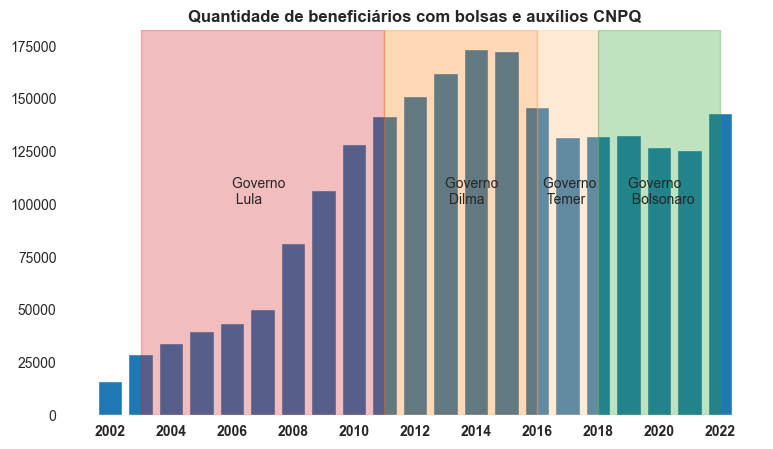

In [758]:
anos = np.arange(start=2002, stop=2023, step=2)
cores = plt.get_cmap('tab20').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle = ciclo_cores)

fig = plt.figure(figsize = (9, 5))
plt.bar(qt_cnpq.index, qt_cnpq['beneficiario'], color = cores[0])
plt.title('Quantidade de beneficiários com bolsas e auxílios CNPQ',
          fontsize=12, weight='bold')
plt.xticks(ticks=anos, fontsize=10, weight='bold')
plt.box(False)
plt.grid(False)

# destaque período Lula
plt.axvspan(2003,2011, alpha=0.3, color=cores[6])
plt.text(2006,100000, "Governo \n Lula")
# # destaque período Dilma
plt.axvspan(2011,2016, alpha=0.3, color=cores[2])
plt.text(2013,100000, "Governo \n Dilma")
# # destaque período Temer
plt.axvspan(2016,2018, alpha=0.3, color=cores[3])
plt.text(2016.2,100000, "Governo \n Temer")
# # destaque período Bolsonaro
plt.axvspan(2018,2022, alpha=0.3, color=cores[4])
plt.text(2019,100000, "Governo \n Bolsonaro");

In [155]:
# recursos liberados Bolsa CNPQ
recursos_cnpq = bd_cnpq.groupby('ano').agg({'valor':'sum'}).reset_index()

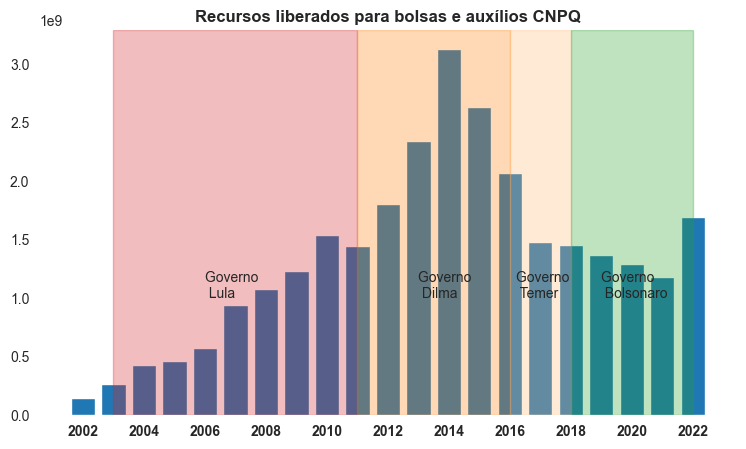

In [760]:
#anos = np.arange(start=2002, stop=2023, step=4)

fig = plt.figure(figsize = (9, 5))
plt.bar(recursos_cnpq['ano'], recursos_cnpq['valor'], color = cores[0])
plt.title('Recursos liberados para bolsas e auxílios CNPQ',
          fontsize=12, weight='bold')
plt.xticks(ticks=anos, labels=anos, fontsize=10, weight='bold')
plt.box(False)
plt.grid(False)

# destaque período Lula
plt.axvspan(2003,2011, alpha=0.3, color=cores[6])
plt.text(2006,1000000000, "Governo \n Lula")
# destaque período Lula
plt.axvspan(2011,2016, alpha=0.3, color=cores[2])
plt.text(2013,1000000000, "Governo \n Dilma")
# destaque período Temer
plt.axvspan(2016,2018, alpha=0.3, color=cores[3])
plt.text(2016.2,1000000000, "Governo \n Temer")
# destaque período Bolsonaro
plt.axvspan(2018,2022, alpha=0.3, color=cores[4])
plt.text(2019,1000000000, "Governo \n Bolsonaro");

In [244]:
cnpq_ano = bd_cnpq.groupby(['ano','grande_area_conhecimento']).agg(
    {'valor':'sum'}).reset_index()

In [543]:
cnpq_ano

,ano,grande_area_conhecimento,valor
0,2002,CIÊNCIAS AGRÁRIAS,1.851075e+07
1,2002,CIÊNCIAS BIOLÓGICAS,2.463734e+07
2,2002,CIÊNCIAS DA SAÚDE,1.109439e+07
3,2002,CIÊNCIAS EXATAS E DA TERRA,3.003955e+07
4,2002,CIÊNCIAS HUMANAS,2.122090e+07
...,...,...,...
219,2022,ENGENHARIAS,2.874904e+08
220,2022,INDEFINIDO,1.162000e+05
221,2022,"LINGÜÍSTICA, LETRAS E ARTES",3.843449e+07
222,2022,OUTRA,7.799887e+07


In [245]:
cnpq_ano_2 = cnpq_ano.loc[~cnpq_ano.grande_area_conhecimento.isin(['OUTRA','INDEFINIDO'])]

In [542]:
cnpq_ano_2.sort_values(['ano','valor'], ascending=[True, False])

,ano,grande_area_conhecimento,valor
3,2002,CIÊNCIAS EXATAS E DA TERRA,3.003955e+07
6,2002,ENGENHARIAS,2.480569e+07
1,2002,CIÊNCIAS BIOLÓGICAS,2.463734e+07
4,2002,CIÊNCIAS HUMANAS,2.122090e+07
0,2002,CIÊNCIAS AGRÁRIAS,1.851075e+07
...,...,...,...
213,2022,CIÊNCIAS AGRÁRIAS,1.889322e+08
217,2022,CIÊNCIAS HUMANAS,1.526797e+08
218,2022,CIÊNCIAS SOCIAIS APLICADAS,7.711632e+07
221,2022,"LINGÜÍSTICA, LETRAS E ARTES",3.843449e+07


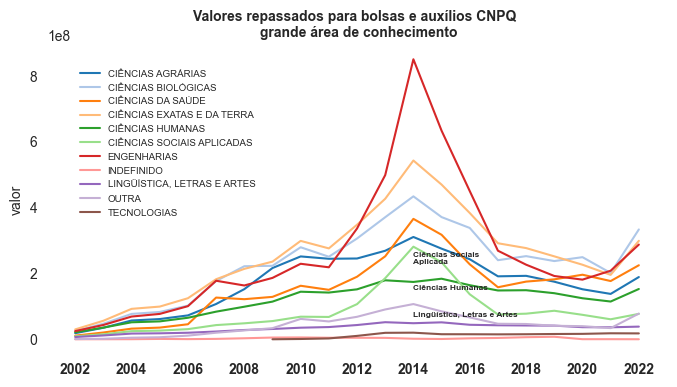

In [761]:
anos = np.arange(start=2002, stop=2023, step=2)
fig = plt.figure(figsize=(8,4))
sns.lineplot(data=cnpq_ano, x='ano', y='valor', hue='grande_area_conhecimento')
plt.xticks(ticks=anos, labels=anos, fontsize=10, weight='bold')
plt.box(False)
plt.grid(False)
plt.xlabel('')
plt.title('Valores repassados para bolsas e auxílios CNPQ \n grande área de conhecimento',fontsize=10, weight='bold')
plt.legend(bbox_to_anchor=(0.35, 0.95), fontsize=7,framealpha=0.0)
# marcadores
#plt.annotate('Lingüística, Letras e Artes', xy=(2014, 70000000), xytext=(2014, 70000000, fontsize=7)  # 4 points vertical offset.
plt.text(2014,70000000, "Lingüística, Letras e Artes", fontsize=6, weight='bold')
plt.text(2014,150000000, "Ciências Humanas", fontsize=6, weight='bold')
plt.text(2014,230000000, "Ciências Sociais\nAplicada", fontsize=6, weight='bold');

In [329]:
bd_cnpq_uf = bd_cnpq.groupby('sigla_uf_origem').agg({'valor':'sum'}).sort_values('valor', ascending=False)

In [683]:
bd_cnpq_uf['valor2'] = round(bd_cnpq_uf['valor']/10000000,1)

In [684]:
bd_cnpq_uf

,valor,valor2
sigla_uf_origem,,
SP,6.891133e+09,689.1
RJ,3.819320e+09,381.9
MG,2.578017e+09,257.8
RS,2.253883e+09,225.4
DF,1.551825e+09,155.2
PR,1.115808e+09,111.6
PE,1.003900e+09,100.4
SC,9.615641e+08,96.2
BA,7.559261e+08,75.6


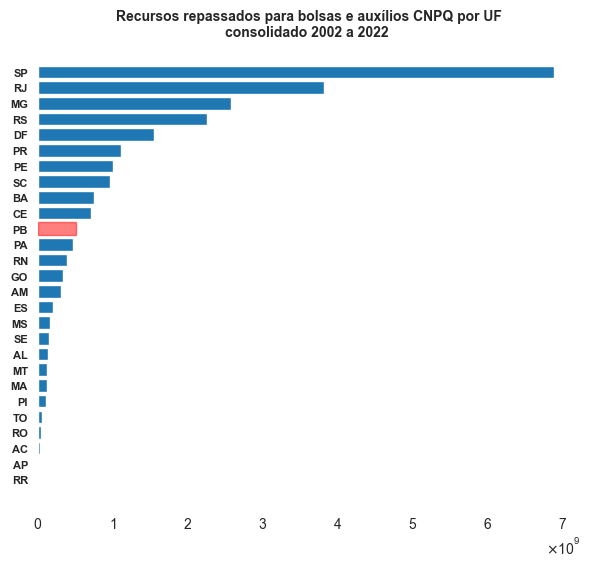

In [767]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter


fig, ax = plt.subplots(figsize = (7, 6))
g1 = plt.barh(bd_cnpq_uf.index, bd_cnpq_uf['valor'])
plt.gca().invert_yaxis()
plt.yticks(fontsize=8, weight='bold')
plt.title('Recursos repassados para bolsas e auxílios CNPQ por UF\nconsolidado 2002 a 2022 ', fontdict={'fontsize': 10, 'weight': 'bold'})

for id, barra in enumerate(bd_cnpq_uf.index):
    if barra == 'PB':
        g1[id].set_color('red')
        g1[id].set_alpha(0.5)
plt.box(False)
plt.grid(False)

# Configurando o eixo y para notação científica
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Controle da notação científica
ax.xaxis.set_major_formatter(formatter)


In [347]:
bd_cnpq_ies = bd_cnpq.groupby('sigla_instituicao_destino').agg({'valor':'sum'}).sort_values('valor', ascending=False).head(30)

In [348]:
bd_cnpq_ies

,valor
sigla_instituicao_destino,
USP,1.872243e+09
UFRJ,1.565647e+09
UFRGS,1.178211e+09
UNICAMP,1.004745e+09
UFMG,9.999279e+08
UFSC,7.004162e+08
UFPE,6.873937e+08
UNB,5.624581e+08
UNESP,5.250297e+08


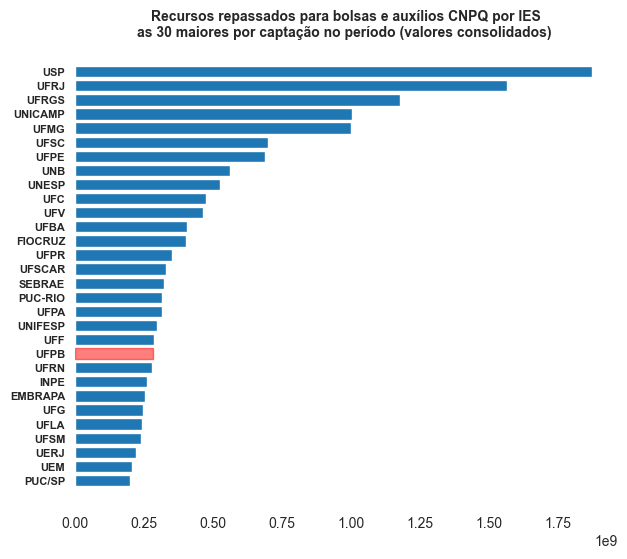

In [550]:
fig = plt.figure(figsize = (7, 6))
g = plt.barh(bd_cnpq_ies.index, bd_cnpq_ies['valor'])
plt.gca().invert_yaxis()
plt.yticks(fontsize=8, weight='bold')
plt.title('Recursos repassados para bolsas e auxílios CNPQ por IES\nas 30 maiores por captação no período (valores consolidados) ', fontdict={'fontsize': 10, 'weight': 'bold'})
for id, barra in enumerate(bd_cnpq_ies.index):
    if barra == 'UFPB':
        g[id].set_color('red')
        g[id].set_alpha(0.5)
plt.box(False)
plt.grid(False)


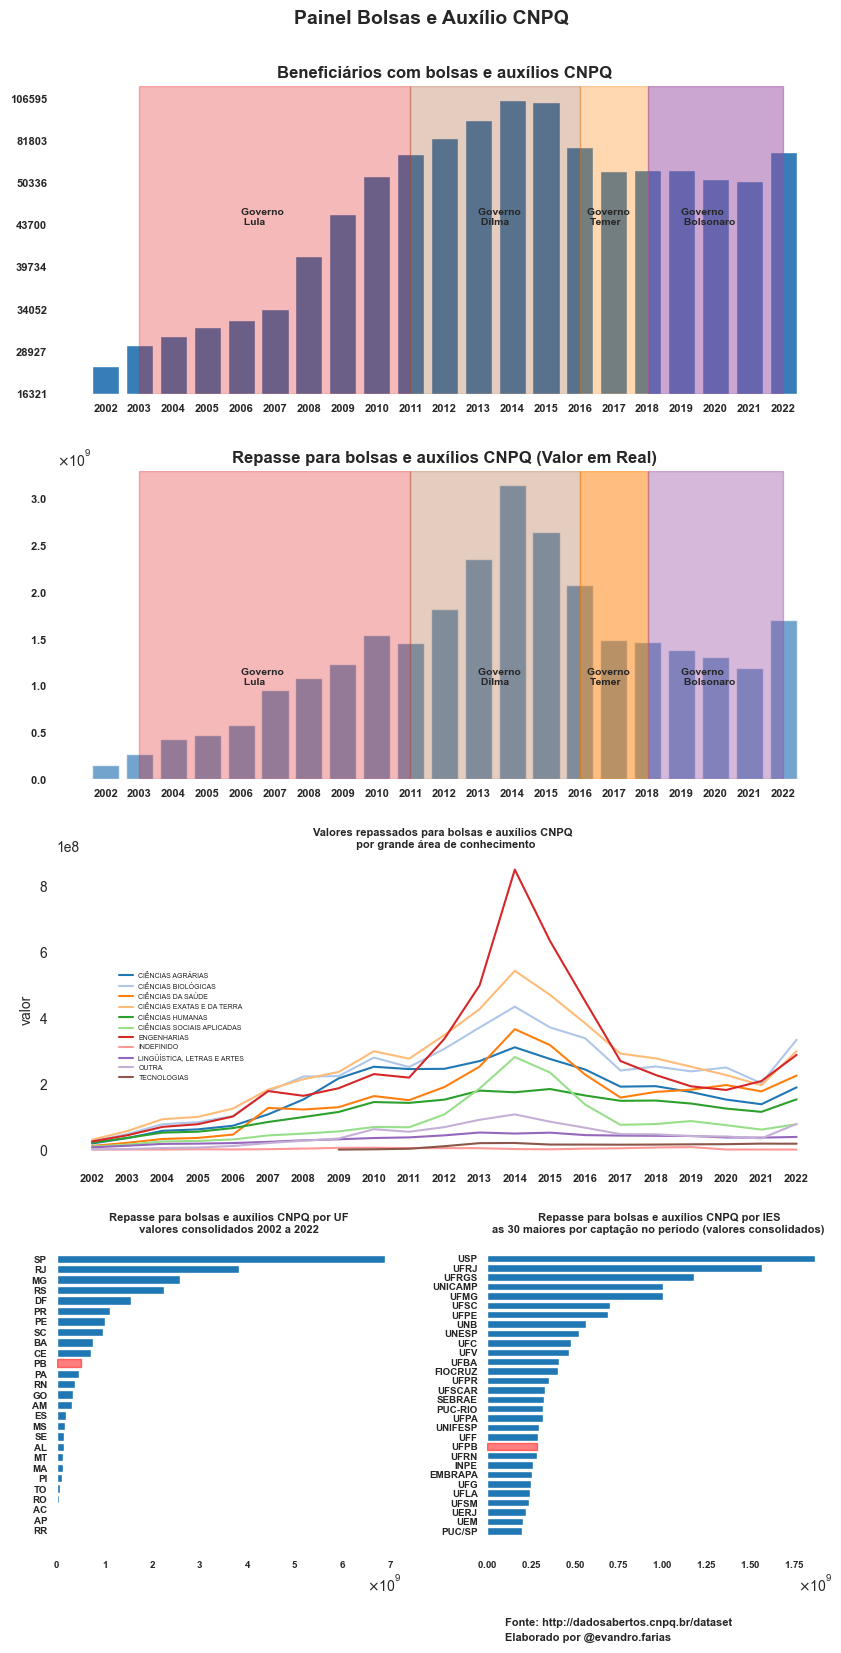

In [801]:
# importando bibliotecas
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

#criando o mosaico
anos = np.arange(start=2002, stop=2023, step=1)
cores = plt.get_cmap('Set1').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle =(cycler('color', plt.get_cmap('tab20').colors)))

mosaico = "AA;BB;EE;CD"
fig = plt.figure(figsize = (10, 19))
espacamento = {'wspace':0.25,'hspace':0.25 }
axs = fig.subplot_mosaic(mosaico, gridspec_kw=espacamento)
# 
# #grafico I
# 
axs['A'].bar(qt_cnpq.index, qt_cnpq['beneficiario'], color = cores[1])
axs['A'].set_title('Beneficiários com bolsas e auxílios CNPQ',
           weight='bold')
axs['A'].set_xticklabels(anos, fontsize=8, weight='bold')
axs['A'].set_xticks(anos)
axs['A'].set_yticklabels(qt_cnpq['beneficiario'], fontsize=8, weight='bold')
axs['A'].grid(False)
axs['A'].set_frame_on(False)
# 
# # destaque período Lula
axs['A'].axvspan(2003,2011, alpha=0.3, color=cores[0])
axs['A'].text(2006,100000, "Governo \n Lula", fontsize=7.5, weight='bold')
# # destaque período Dilma
axs['A'].axvspan(2011,2016, alpha=0.3, color=cores[6])
axs['A'].text(2013,100000, "Governo \n Dilma", fontsize=7.5, weight='bold')
# # # # destaque período Temer
axs['A'].axvspan(2016,2018, alpha=0.3, color=cores[4])
axs['A'].text(2016.2,100000, "Governo \n Temer", fontsize=7.5, weight='bold')
# # # # destaque período Bolsonaro
axs['A'].axvspan(2018,2022, alpha=0.5, color=cores[3])
axs['A'].text(2019,100000, "Governo \n Bolsonaro", fontsize=7.5, weight='bold');

# grafico II

axs['B'].bar(recursos_cnpq['ano'], recursos_cnpq['valor'], color = cores[1], alpha=0.7)
axs['B'].set_title('Repasse para bolsas e auxílios CNPQ (Valor em Real)',
          fontsize=12, weight='bold')
axs['B'].set_xticks(anos)
axs['B'].set_xticklabels(anos, fontsize=8, weight='bold')
axs['B'].set_yticklabels(recursos_cnpq['valor'], fontsize=8, weight='bold')
# destaque período Lula
axs['B'].axvspan(2003,2011, alpha=0.3, color=cores[0])
axs['B'].text(2006,1000000000, "Governo \n Lula", fontsize=7.5, weight='bold')
# destaque período Dilma
axs['B'].axvspan(2011,2016, alpha=0.3, color=cores[6])
axs['B'].text(2013,1000000000, "Governo \n Dilma", fontsize=7.5, weight='bold')
# destaque período Temer
axs['B'].axvspan(2016,2018, alpha=0.5, color=cores[4])
axs['B'].text(2016.2,1000000000, "Governo \n Temer", fontsize=7.5, weight='bold')
# destaque período Bolsonaro
axs['B'].axvspan(2018,2022, alpha=0.4, color=cores[3])
axs['B'].text(2019,1000000000, "Governo \n Bolsonaro", fontsize=7.5, weight='bold')
axs['B'].grid(False)
axs['B'].set_frame_on(False)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))
axs['B'].yaxis.set_major_formatter(formatter);

# gráfico III 

g1 = axs['C'].barh(bd_cnpq_uf.index, bd_cnpq_uf['valor'])
axs['C'].set_yticklabels(bd_cnpq_uf.index, fontsize=7, weight='bold')
axs['C'].set_xticklabels(bd_cnpq_uf['valor'], fontsize=7, weight='bold')
axs['C'].set_title('Repasse para bolsas e auxílios CNPQ por UF\n valores consolidados 2002 a 2022 ', fontdict={'fontsize': 8, 'weight': 'bold'})
for id, barra in enumerate(bd_cnpq_uf.index):
    if barra == 'PB':
        g1[id].set_color('red')
        g1[id].set_alpha(0.5)
axs['C'].invert_yaxis()        
axs['C'].grid(False)
axs['C'].set_frame_on(False)
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))
axs['C'].xaxis.set_major_formatter(formatter) ;

# Grafico IV

g = plt.barh(bd_cnpq_ies.index, bd_cnpq_ies['valor'])
axs['D'].invert_yaxis() 
axs['D'].set_yticklabels(bd_cnpq_ies.index, fontsize=7, weight='bold')
axs['D'].set_xticklabels(bd_cnpq_ies.index, fontsize=7, weight='bold')
axs['D'].set_title('Repasse para bolsas e auxílios CNPQ por IES\nas 30 maiores por captação no período (valores consolidados) ', fontdict={'fontsize': 8, 'weight': 'bold'})
for id, barra in enumerate(bd_cnpq_ies.index):
    if barra == 'UFPB':
        g[id].set_color('red')
        g[id].set_alpha(0.5)
axs['D'].grid(False)
axs['D'].set_frame_on(False)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))
axs['D'].xaxis.set_major_formatter(formatter)

# Grafico E

sns.lineplot(data=cnpq_ano, x='ano', y='valor', hue='grande_area_conhecimento', ax=axs['E'])
axs['E'].set_xticklabels(anos, fontsize=8, weight='bold')
axs['E'].set_xticks(anos)
axs['E'].set_xlabel('')
axs['E'].set_title('Valores repassados para bolsas e auxílios CNPQ \n por grande área de conhecimento',fontsize=8, weight='bold')
axs['E'].legend(bbox_to_anchor=(0.25, 0.25), fontsize=5, framealpha=0.0)
# marcadores
#plt.annotate('Lingüística, Letras e Artes', xy=(2014, 70000000), xytext=(2014, 70000000, fontsize=7)  # 4 points vertical offset.
# axs['E'].text(2014,70000000, "Lingüística, Letras e Artes", fontsize=6, weight='bold')
# axs['E'].text(2014,150000000, "Ciências Humanas", fontsize=6, weight='bold')
# axs['E'].text(2014,230000000, "Ciências Sociais\nAplicada", fontsize=6, weight='bold');

axs['E'].grid(False)
axs['E'].set_frame_on(False)

#ajustes finais

fig.suptitle('Painel Bolsas e Auxílio CNPQ', fontsize=14, weight='bold', y=0.92)
plt.tight_layout(rect=[0,0,0,0.93])
#plt.subplots_adjust(top=0.8)

# Adicionar anotações
plt.annotate('Fonte: http://dadosabertos.cnpq.br/dataset', xy=(0.05, -0.25), xycoords='axes fraction', fontsize=8, weight='bold')
plt.annotate('Elaborado por @evandro.farias', xy=(0.05, -0.30), xycoords='axes fraction', fontsize=8, weight='bold')


plt.savefig('cnpq.png', dpi=300);
